In [65]:
import numpy as np
import importlib
import sys
sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Parallel_Simulation')
from Data_Treatement import *
import matplotlib.pyplot as plt
from scipy.special import erfc
from matplotlib import colormaps
cm = colormaps['viridis']

In [66]:
media = "/media/hcleroy/Simulation_Res/Parallel_Simulation_aging/make_graph/N3/"
names = ['ksL_1','ksL_01','ksL_001','ksL_0001','ksL_1E10','ksL_01E10','ksL_001E10','ksL_1E20','ksL_1E25']#,'ksL_1E5']
k_value = [1.,0.1,0.01,0.001,1.,1.]
Eb = [-15,-15,-15,-15,-10,-10,-10,-20,-25]

In [72]:
#data = {k_value[n]: Data_Treatement(media+names[n]+'.hdf',data_type='NRG') for n in range(names.__len__())}
data_3 = [Data_Treatement(media+names[n]+'.hdf',data_type='NRG') for n in range(names.__len__())]
media = "/media/hcleroy/Simulation_Res/Parallel_Simulation_aging/make_graph/N5/"
names = ['ksL_1','ksL_01','ksL_001']
data_5 = [Data_Treatement(media+names[n]+'.hdf',data_type='NRG') for n in range(names.__len__())]

# First look at the relaxation

In [73]:
for value in data_3 :
    value.average(num_bins=100,log_scale=True)
for value in data_5 :
    value.average(num_bins=100,log_scale=True)

/home/hcleroy/PostDoc/aging_condensates/Simulation/Parallel_Simulation/Data_Treatement.py:272: RuntimeWarning: invalid value encountered in divide
  # Add the weighted average to the respective bin


2531.0242469692907


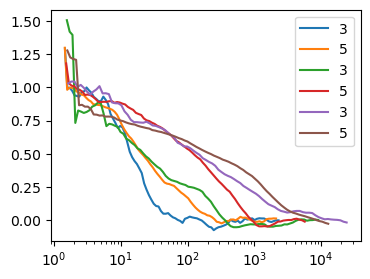

In [81]:
plt.figure(figsize=(4,3))
#for n,value in enumerate(data):
for n in range(3):
    x,y = data_3[n].curate_data(0,-1)
    plt.plot(x,y,label=3)
    x,y = data_5[n].curate_data(0,-1)
    plt.plot(x,y,label=5)
#plt.ylim(-2515,-2500)
plt.xscale('log')
plt.legend()
print(10**3*np.log(np.pi*4))

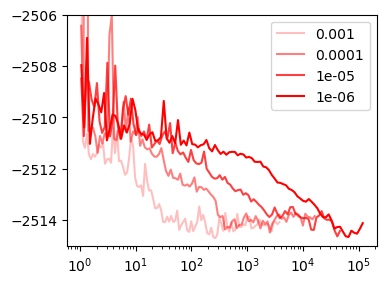

In [71]:
plt.figure(figsize=(4,3))
#for n,value in enumerate(data):
for n in [0,1,2,3]:
    plt.plot(data[n].binned_time,data[n].average_data-3*Eb[n],label=data[n].attributes['kdiff'],color='red',alpha=(n+1)/4)
#for n in [4,5,6]:
#    plt.plot(data[n].binned_time,data[n].average_data-3*Eb[n],label=data[n].attributes['kdiff'],color='black',alpha = (n-3)/3)    
plt.ylim(-2515,-2506)
plt.xscale('log')
plt.legend()

# Look at the evolution of the pair probability density

In [8]:
Peq = lambda r,ell_tot, : 3/(2*np.pi*ell_tot*r)*erfc(np.sqrt(3/(2*ell_tot))*r)

In [9]:
pcfs = [Data_Treatement(media+names[n]+'.hdf',data_type='PCF') for n in range(names.__len__())]

In [10]:
for pcf in pcfs:
    pcf.average()

Looking at the influence of the binding energy, we see that once the binding energy is strong enough, we don't see any influence of the binding energy on the pair probability density. 

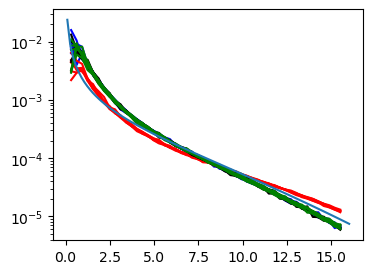

In [11]:
plt.figure(figsize=(4,3))
color = ['blue','red','black','green']
n=0
for i in [0,4,-2,-1]:
    #print(pcfs[i].attributes['Energy'])
    #print(pcfs[i].attributes['kdiff']*pcfs[i].attributes['ell_tot'])
    #print()
    for x,pcf in zip(pcfs[i].binned_time,pcfs[i].average_data):
        plt.plot(x,pcf,color=color[n])
    n+=1
plt.plot(np.linspace(0.1,16,100),Peq(np.linspace(0.1,16,100),10**3/5))
plt.yscale('log')

Now looking at the time evolution at "high" kdiff: we don't see much difference as time goes

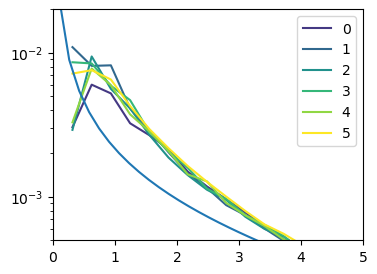

In [12]:
plt.figure(figsize=(4,3))
n=0
for x,pcf in zip(pcfs[i].binned_time,pcfs[i].average_data):
        plt.plot(x,pcf,color=cm((n+1)/pcfs[i].average_data.shape[0]),label=n)
        n+=1
plt.plot(np.linspace(0.1,16,100),Peq(np.linspace(0.1,16,100),10**3/5))
plt.xlim(0,5)
plt.legend()
plt.ylim(5*10**-4,2*10**-2)
plt.yscale('log')

Now looking at the evolution of the binding energy = -15

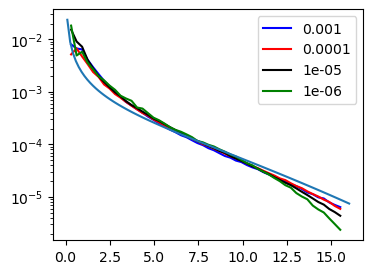

In [13]:
plt.figure(figsize=(4,3))
color = ['blue','red','black','green','orange']
n=0
for i in [0,1,2,3]:
    #print(pcfs[i].attributes['Energy'])
    #print(pcfs[i].attributes['kdiff']*pcfs[i].attributes['ell_tot'])
    #print()
    
    
    plt.plot(pcfs[i].binned_time[-1],pcfs[i].average_data[-1],color=color[n],label=pcfs[i].attributes['kdiff'])
    n+=1
plt.plot(np.linspace(0.1,16,100),Peq(np.linspace(0.1,16,100),10**3/5))
plt.yscale('log')
#plt.xlim(0,5)
plt.legend()

In [61]:
import Data_Treatement
importlib.reload(Data_Treatement)
from Data_Treatement import *

In [62]:
#names = ['1_15','01_15','001_15','1_10','01_10','001_10']
names = ['1_15','01_15','1_20','01_20','1_30','01_30','1_100','01_100']
nrjs = [Data_Treatement(media+names[n]+'.hdf',data_type='NRG') for n in range(names.__len__())]
entropy = [Data_Treatement(media+names[n]+'.hdf',data_type='Entropy') for n in range(names.__len__())]

In [59]:
num_bins = 100
X = np.array([np.linspace(0,100,1000),np.linspace(10,80,1000)])
Y = [X[0]**2,X[1]**2]
bins = np.linspace(X.min(), X.max(), num_bins + 1)
bin_centers = (bins[:-1] + bins[1:]) / 2
weighted_average = np.zeros(num_bins)
count = np.zeros(num_bins)

for x,y in zip(X,Y):
    bin_indices = np.digitize(x, bins) - 1
    dx = np.diff(np.append(0,x), prepend=0)[1:]
    #y_weighted_avg = np.sum(y * dx) / np.sum(dx)
    for i in range(num_bins):
        in_bin = bin_indices == i
        if np.any(in_bin):
            weighted_average[i] += np.sum(y[in_bin]*dx[in_bin])/np.sum(dx[in_bin])
            count[i] +=1
weighted_average/=count


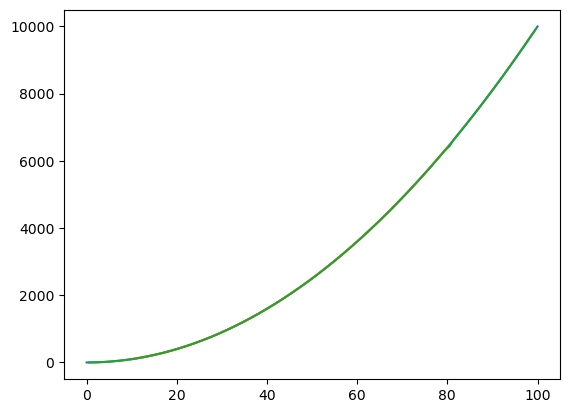

In [60]:
plt.plot(X[0],Y[0])
plt.plot(X[1],Y[1])
plt.plot(bin_centers,weighted_average)
#plt.xlim(90,100)

In [63]:
for ent in entropy:
    ent.average(num_bins=100,log_scale=True)
for nrj in nrjs:
    nrj.average(num_bins=100,log_scale=True)

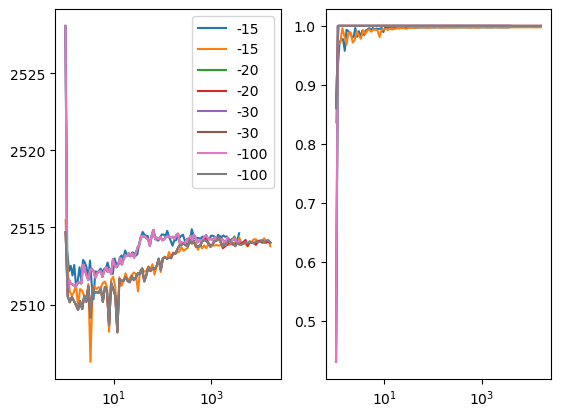

In [64]:
fig,ax = plt.subplots(ncols=2)
energies = [-15,-15,-20,-20,-30,-30,-100,-100]
for ent in entropy:
    ax[0].plot(ent.binned_time,ent.average_data,label=ent.attributes['Energy'])
ax[0].legend()
n=0
for nrj in nrjs:
    ax[1].plot(nrj.binned_time,(nrj.average_data/energies[n])/3)
    n+=1
ax[0].set_xscale('log')
ax[1].set_xscale('log')

In [40]:
dts = nrjs[0].time[0].astype(float)-np.append(0,nrjs[0].time[0].astype(float))[:-1]
print(dts - np.diff(np.append(0,nrjs[0].time[0].astype(float)), prepend=0)[1:])
print(dts.shape)
np.sum(nrjs[0].data[0]/(-15) * dts) / nrjs[0].time[0][-1]

[0. 0. 0. ... 0. 0. 0.]
(10000,)


2.9924951369044774